# Sequence Classification with Recurrent Neural Networks in Python with Keras

##### LSTM for sequence classification in the IMDB dataset

Documentation on the IMDB dataset on keras: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras

y is 0/1 and represents the sentiment on the review

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
np.random.seed(7)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load the dataset but only keep the top n words, zero the rest

In [2]:
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

Truncate and pad input sequences

In [3]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['grid.linestyle'] = ':'

def plot_history(history):
    
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6361 - acc: 0.6159 - val_loss: 0.4780 - val_acc: 0.7830
Epoch 2/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.3838 - acc: 0.8383 - val_loss: 0.3925 - val_acc: 0.8347
Epoch 3/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2851 - acc: 0.8874 - val_loss: 0.4051 - val_acc: 0.8378
Epoch 4/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.1616 - acc: 0.9433 - val_loss: 0.4627 - val_acc: 0.8170
Epoch 5/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0821 - acc: 0.9750 - val_loss: 0.5240 - val_acc: 0.8271
Epoch 6/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0441 - acc: 0.9903 - val_loss: 0.5753 - val_acc: 0.8156
Epoch 7/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0436 - acc: 0.9879 - val_loss: 0.6535 - val_acc

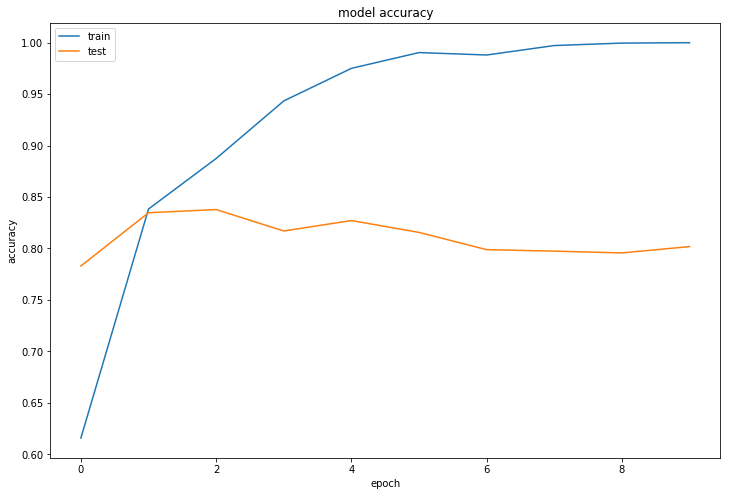

In [7]:
plot_history(history)

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 159s 6ms/step - loss: 0.4796 - acc: 0.7532 - val_loss: 0.3269 - val_acc: 0.8618
Epoch 2/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.2575 - acc: 0.8998 - val_loss: 0.3094 - val_acc: 0.8696
Epoch 3/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.1901 - acc: 0.9312 - val_loss: 0.3090 - val_acc: 0.8783
Epoch 4/10
25000/25000 [==============================] - 154s 6ms/step - loss: 0.1510 - acc: 0.9470 - val_loss: 0.3465 - val_acc: 0.8654
Epoch 5/10
25000/25000 [==============================] - 157s 6ms/step - loss: 0.1194 - acc: 0.9616 - val_loss: 0.3748 - val_acc: 0.8671
Epoch 6/10
25000/25000 [==============================] - 160s 6ms/step - loss: 0.0968 - acc: 0.9699 - val_loss: 0.4031 - val_acc: 0.8668
Epoch 7/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.0834 - acc: 0.9744 - val_loss: 0.4396 - 

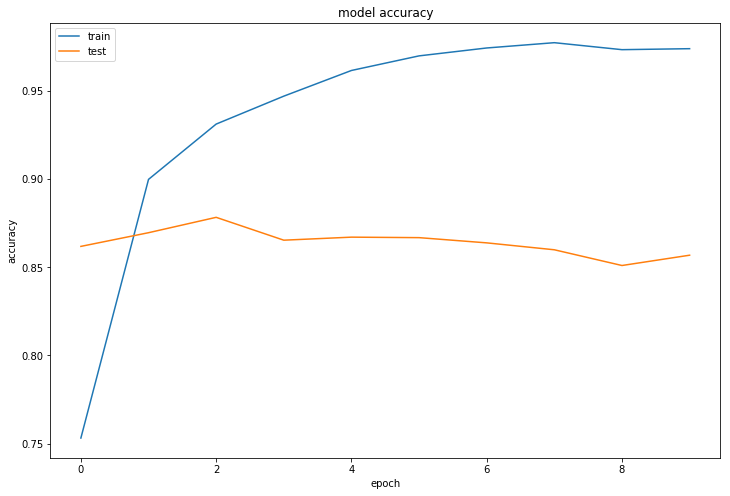

In [10]:
plot_history(history)

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 161s 6ms/step - loss: 0.5123 - acc: 0.7329 - val_loss: 0.4004 - val_acc: 0.8434
Epoch 2/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.2602 - acc: 0.8996 - val_loss: 0.3023 - val_acc: 0.8765
Epoch 3/10
25000/25000 [==============================] - 157s 6ms/step - loss: 0.1878 - acc: 0.9344 - val_loss: 0.3117 - val_acc: 0.8736
Epoch 4/10
25000/25000 [==============================] - 154s 6ms/step - loss: 0.1466 - acc: 0.9503 - val_loss: 0.3473 - val_acc: 0.8705
Epoch 5/10
25000/25000 [==============================] - 157s 6ms/step - loss: 0.1220 - acc: 0.9601 - val_loss: 0.4039 - val_acc: 0.8566
Epoch 6/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.1019 - acc: 0.9671 - val_loss: 0.4124 - val_acc: 0.8584
Epoch 7/10
25000/25000 [==============================] - 160s 6ms/step - loss: 0.0863 - acc: 0.9731 - val_loss: 0.4715 - 

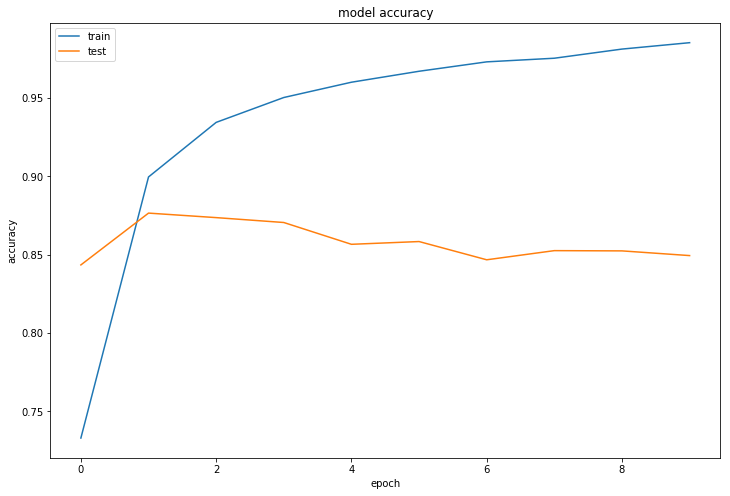

In [13]:
plot_history(history)

In [14]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(top_words, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model.fit(X_train, y_train, batch_size=256, epochs=3, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 156s 6ms/step - loss: 0.2385 - acc: 0.9088 - val_loss: 0.3037 - val_acc: 0.8761
Epoch 2/3
25000/25000 [==============================] - 154s 6ms/step - loss: 0.1819 - acc: 0.9377 - val_loss: 0.2993 - val_acc: 0.8767
Epoch 3/3
25000/25000 [==============================] - 144s 6ms/step - loss: 0.1450 - acc: 0.9521 - val_loss: 0.3319 - val_acc: 0.8747


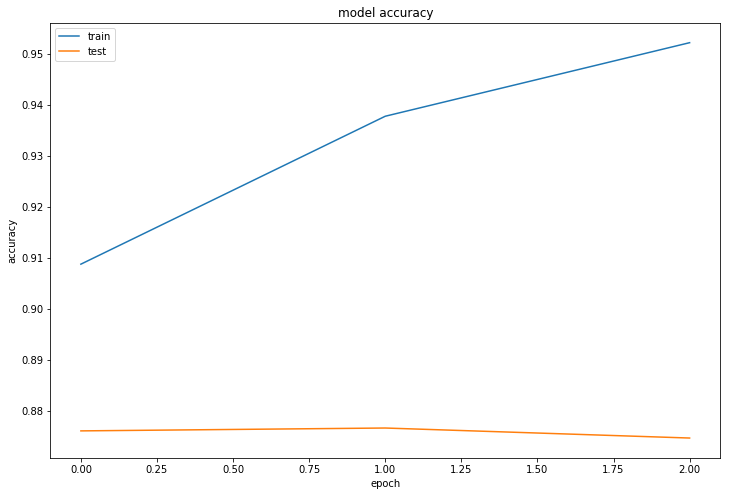

In [19]:
plot_history(history)